In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
schema = pd.DataFrame([{'age': 'Age of the patient',
                        'sex': 'Sex of the patient (0 = Female; 1 = Male)',
                        'cp': 'Chest Pain type: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic',
                        'trtbps': 'Resting blood pressure (in mm Hg)',
                        'chol': 'Serum cholestoral in mg/dl',
                        'fbs' : 'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
                        'restecg' : 'Resting ECG results (0 = normal; 1 = having ST-T; 2 = hypertrophy)',
                        'thalachh' : 'Maximum heart rate achieved',
                        'exng': 'Exercise induced angina (1 = yes; 0 = no)',
                        'oldpeak': 'ST depression induced by exercise relative to rest',
                        'slp': 'The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)',
                        'caa': 'Number of major vessels (0-3) colored by flourosopy',
                        'thall': 'thal - 3 = normal; 6 = fixed defect; 7 = reversable defect',
                        'output' : '0= less chance of heart attack 1= more chance of heart attack'}])



for col in df.columns:
    print(col, '=\n', schema[col][0])

age =
 Age of the patient
sex =
 Sex of the patient (0 = Female; 1 = Male)
cp =
 Chest Pain type: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
trtbps =
 Resting blood pressure (in mm Hg)
chol =
 Serum cholestoral in mg/dl
fbs =
 Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg =
 Resting ECG results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
thalachh =
 Maximum heart rate achieved
exng =
 Exercise induced angina (1 = yes; 0 = no)
oldpeak =
 ST depression induced by exercise relative to rest
slp =
 The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
caa =
 Number of major vessels (0-3) colored by flourosopy
thall =
 thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
output =
 0= less chance of heart attack 1= more chance of heart attack


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
df_plot = df.copy()
df_plot.columns = [schema[col][0] for col in df.columns]
df_plot.hist(figsize=(12, 12));
# plt.show()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

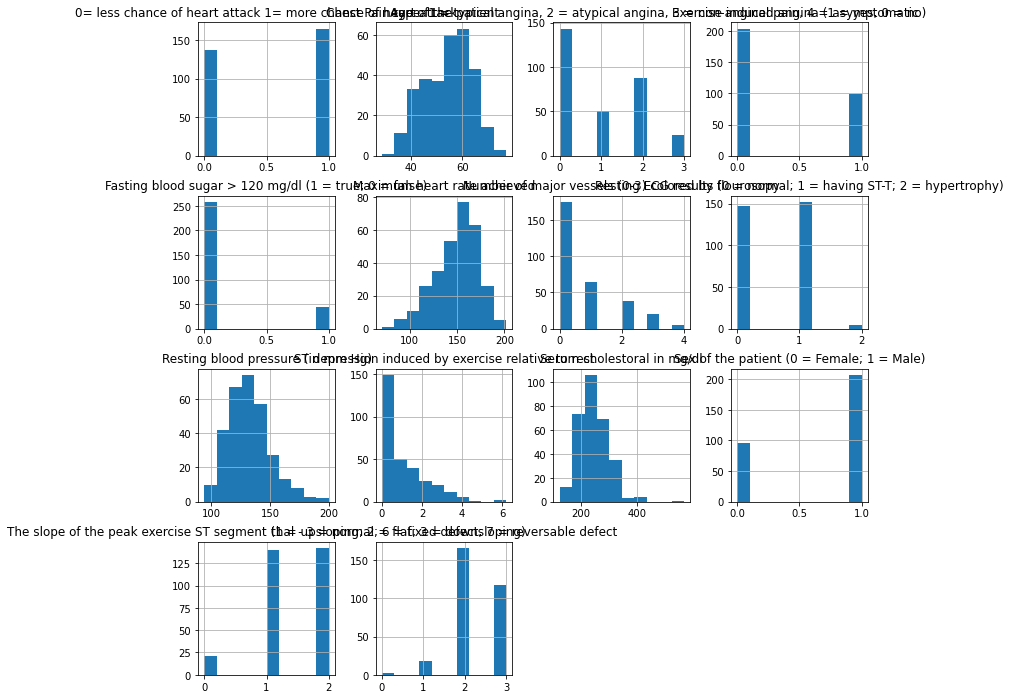

In [83]:
df.thall.value_counts()

In [91]:
# Reassign categoricals
def preprocess(df):
    df = df.copy()
    df['sex'] = df.sex.replace({0: 'female', 1: 'male'})
    df['cp'] = df.cp.replace({0: np.nan, 1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})
    df['fbs'] = df.fbs.map(bool)
    df['restecg'] = df.restecg.replace({0: 'normal', 1: 'having ST-T', 2: 'hypertrophy'})
    df['exng'] = df.exng.map(bool)
    df['slp'] = df.slp.replace({1: 'upsloping', 2: 'flat', 3: 'downsloping'})
    df['thall'] = df.thall.replace({0: np.nan, 1: 'fixed', 2: 'normal', 3: 'reversible'})
    
    return df

df = preprocess(df)

In [92]:
df.isna().mean()

age         0.000000
sex         0.000000
cp          0.471947
trtbps      0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalachh    0.000000
exng        0.000000
oldpeak     0.000000
slp         0.000000
caa         0.000000
thall       0.006601
output      0.000000
dtype: float64

In [50]:
print('Target counts:')
print(df.output.value_counts())
print('Mean:', df.output.mean())

Target counts:
1    165
0    138
Name: output, dtype: int64
Mean: 0.5445544554455446


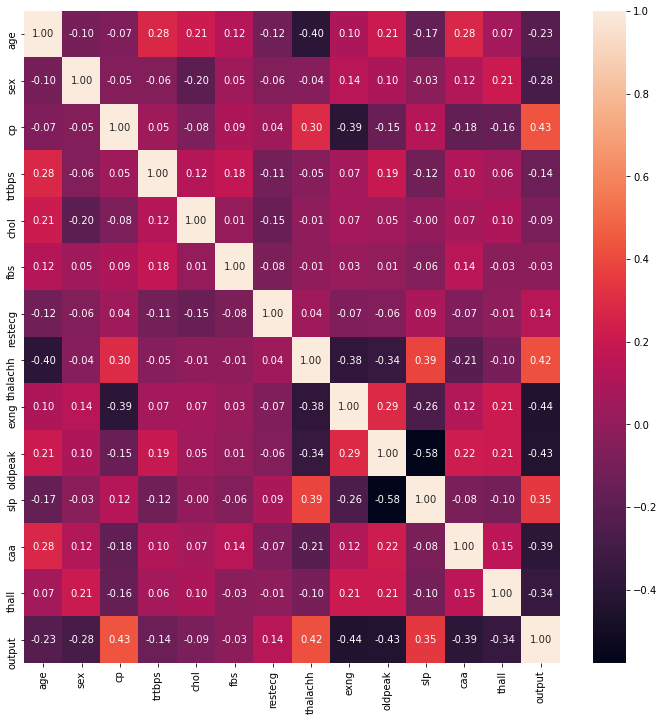

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [9]:
df.corr().output.sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

In [18]:
def preprocess(df):
    X = df.drop('output', axis=1)
    y = df.output
    return X, y


def train(X, y, model_constructor=LinearRegression, **model_args):
    model = model_constructor(**model_args)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model.fit(X_train, y_train)

    return model, X_train, X_test, y_train, y_test


def evaluate(model, X_train, X_test, y_train, y_test, metric=r2_score):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    score_train = metric(y_train, y_pred_train.round())
    score_test = metric(y_test, y_pred_test.round())

    return score_train, score_test


print(*evaluate(*train(*preprocess(df), normalize=True), metric=classification_report))



              precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.84      0.92      0.88       115

    accuracy                           0.86       212
   macro avg       0.87      0.86      0.86       212
weighted avg       0.87      0.86      0.86       212
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [19]:
print(*evaluate(*train(*preprocess(df), model_constructor=RandomForestClassifier), metric=classification_report))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [20]:
model, *split_data = train(*preprocess(df), model_constructor=RandomForestClassifier)

In [21]:
def optimize(df, test_size, model_constructor, param_list, plot=True):
    X, y = preprocess(df)
    out_data = []

    out_model = None     
    top_test_score = 0   
    
    for params in param_list:
        model, *split_data = train(X, y, model_constructor=model_constructor, **params)
        train_score, test_score = evaluate(model, *split_data, metric=recall_score)
        out_data.append({'params': params, 'train_score': train_score, 'test_score': test_score})

        if test_score >  top_test_score:
            out_model = model
            top_test_score = test_score
    
    if plot:
        plt.figure()
        plt.plot([x['train_score'] for x in out_data])
        plt.plot([x['test_score'] for x in out_data])
        plt.legend(['Train', 'Test'])
        plt.show()

    return out_model, out_data

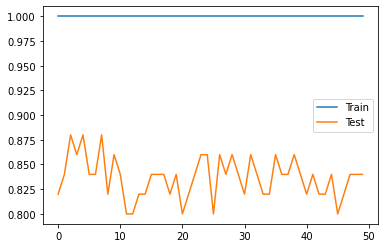

In [22]:
results = optimize(df, 0.3, RandomForestClassifier, [{'n_estimators': int(x)} for x in np.linspace(5, 500, 50)])

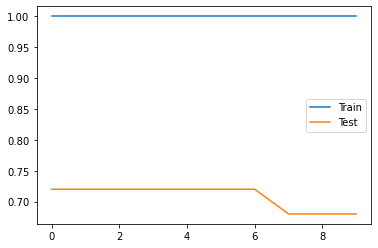

In [23]:
results = optimize(df, 0.3, GradientBoostingClassifier, [{'n_estimators': int(x), 'max_depth': 8} for x in np.linspace(5, 500, 10)])

In [123]:
model, history = results

In [124]:
np.asarray(list(map(lambda x: x.feature_importances_, model.estimators_)))

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'